# Predicting mortality by heart failure based on medical records

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem definition
In a statement,
> We want to predict mortality by heart failure based on patients medical records

## 2. Data
Our data came from:
> https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

## 3. Evaluation
> If we can reach 90% of accuracy in predicting mortality by heart failure based on medical records, in proof of concept, we'll pursue the project.

## 4. Features
1. Age: in years
2. Anemia: Decrease of red blood cells or hemoglobin (boolean)
3. CPK Level: Level of the CPK enzyme in the blood (mcg/L)
4. Diabetes: If the patient has diabetes (boolean)
5. Ejection Fraction: Percentage of blood leaving the heart at each contraction (percentage)
6. Hihgh Blood Pressure: If the patient has hypertension (boolean)
7. Platelets: Platelets in the blood (kiloplatelets/mL)
8. Serum Creatinine: Level of serum creatinine in the blood (mg/dL)
9. Serum Sodium: Level of serum sodium in the blood (mEq/L)
10. Sex: Woman or man (binary)
11. Smoking: If the patient smokes or not (boolean)
12. Time: Follow-up period (days)
13. Death Event: If the patient deceased during the follow-up period (boolean)

## Preparing the tools
We use numpy, pandas and matplotlib for data analysis and manipulation.


In [838]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Model evaluation
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, recall_score

## Load Data

In [839]:
np.random.seed(42)
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.sample(frac=1)
df.shape # (rows, cols)

(299, 13)

## EDA (Exploratory Data Analysis)

In [840]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,1,250,0
265,50.0,1,298,0,35,0,362000.0,0.9,140,1,1,240,0
164,45.0,0,2442,1,30,0,334000.0,1.1,139,1,0,129,1
9,80.0,1,123,0,35,1,388000.0,9.4,133,1,1,10,1
77,42.0,0,102,1,40,0,237000.0,1.2,140,1,0,74,0


In [841]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
188,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172,0
71,58.000,0,582,1,35,0,122000.00,0.9,139,1,1,71,0
106,55.000,0,748,0,45,0,263000.00,1.3,137,1,0,88,0
270,44.000,0,582,1,30,1,263358.03,1.6,130,1,1,244,0
102,80.000,0,898,0,25,0,149000.00,1.1,144,1,1,87,0


In [842]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<Axes: >

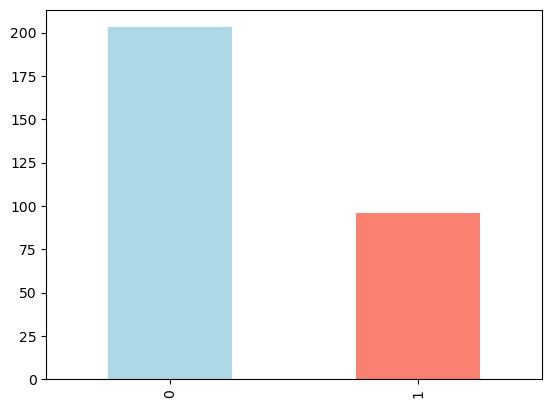

In [843]:
df.DEATH_EVENT.value_counts().plot(kind='bar', color=['lightblue', 'salmon'])

In [844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 281 to 102
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.7 KB


In [845]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [846]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [847]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [848]:
df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

In [849]:
pd.crosstab(df.DEATH_EVENT, df.sex)

sex,0,1
DEATH_EVENT,,
0,71,132
1,34,62


Text(0.5, 1.0, 'Death event based on sex')

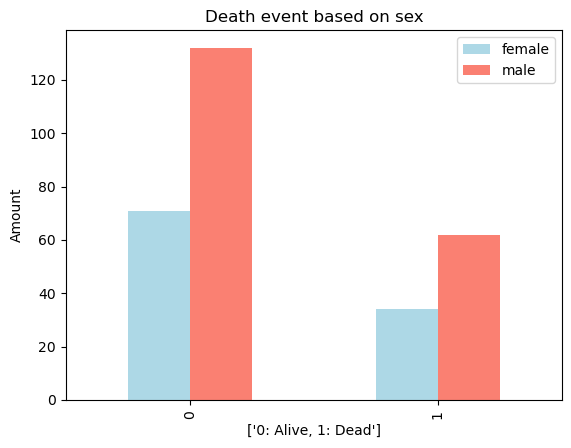

In [850]:
pd.crosstab(df.DEATH_EVENT, df.sex).plot(kind='bar', color=['lightblue', 'salmon'])
plt.xlabel(['0: Alive, 1: Dead'])
plt.ylabel('Amount')
plt.legend(['female', 'male'])
plt.title("Death event based on sex")

In [851]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [852]:
pd.crosstab(df.DEATH_EVENT, df.anaemia)

anaemia,0,1
DEATH_EVENT,,
0,120,83
1,50,46


Text(0.5, 1.0, 'Death event based on anaemia')

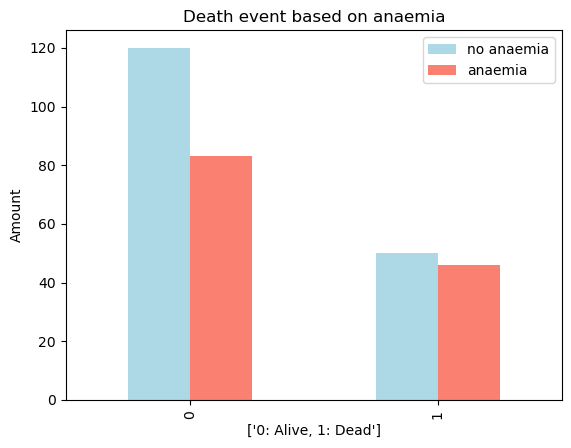

In [853]:
pd.crosstab(df.DEATH_EVENT, df.anaemia).plot(kind='bar', color=['lightblue', 'salmon'])
plt.xlabel(['0: Alive, 1: Dead'])
plt.ylabel('Amount')
plt.legend(['no anaemia', 'anaemia'])
plt.title("Death event based on anaemia")

In [854]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [855]:
pd.crosstab(df.DEATH_EVENT, df.diabetes)

diabetes,0,1
DEATH_EVENT,,
0,118,85
1,56,40


Text(0.5, 1.0, 'Death event based on diabetes')

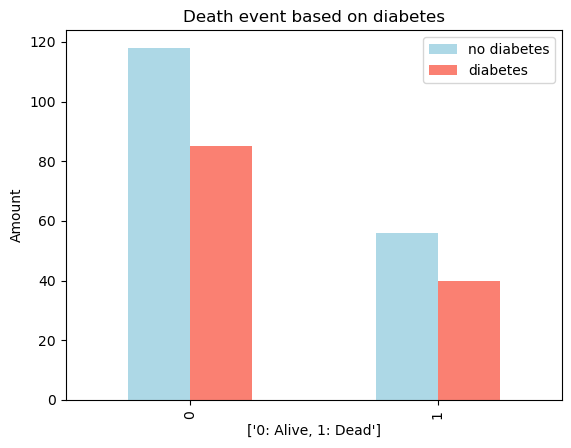

In [856]:
pd.crosstab(df.DEATH_EVENT, df.diabetes).plot(kind='bar', color=['lightblue', 'salmon'])
plt.xlabel(['0: Alive, 1: Dead'])
plt.ylabel('Amount')
plt.legend(['no diabetes', 'diabetes'])
plt.title("Death event based on diabetes")

In [857]:
df.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [858]:
pd.crosstab(df.DEATH_EVENT, df.high_blood_pressure)

high_blood_pressure,0,1
DEATH_EVENT,,
0,137,66
1,57,39


Text(0.5, 1.0, 'Death event based on BP')

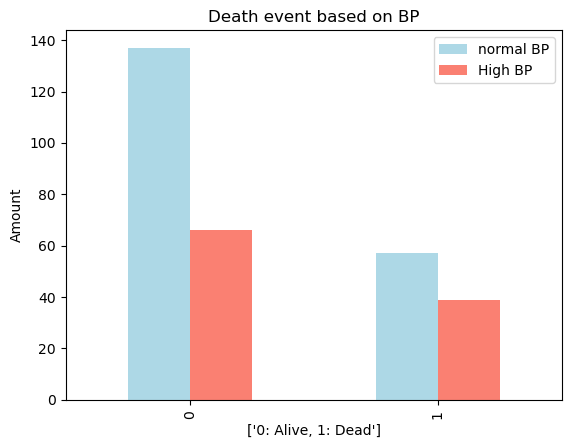

In [859]:
pd.crosstab(df.DEATH_EVENT, df.high_blood_pressure).plot(kind='bar', color=['lightblue', 'salmon'])
plt.xlabel(['0: Alive, 1: Dead'])
plt.ylabel('Amount')
plt.legend(['normal BP', 'High BP'])
plt.title("Death event based on BP")

In [860]:
df.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [861]:
pd.crosstab(df.DEATH_EVENT, df.smoking)

smoking,0,1
DEATH_EVENT,,
0,137,66
1,66,30


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

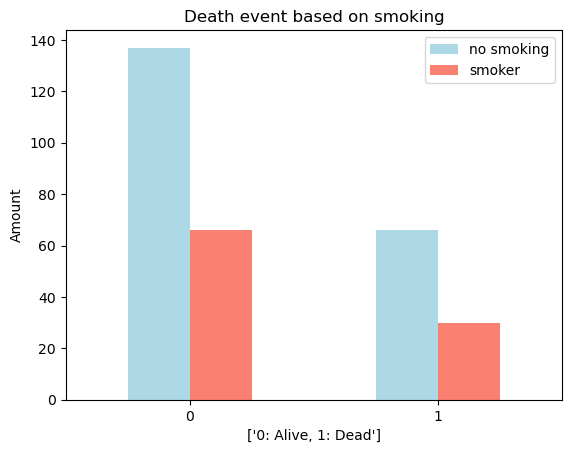

In [862]:
pd.crosstab(df.DEATH_EVENT, df.smoking).plot(kind='bar', color=['lightblue', 'salmon'])
plt.xlabel(['0: Alive, 1: Dead'])
plt.ylabel('Amount')
plt.legend(['no smoking', 'smoker'])
plt.title("Death event based on smoking")
plt.xticks(rotation=0)

Text(0.5, 0, 'CPK')

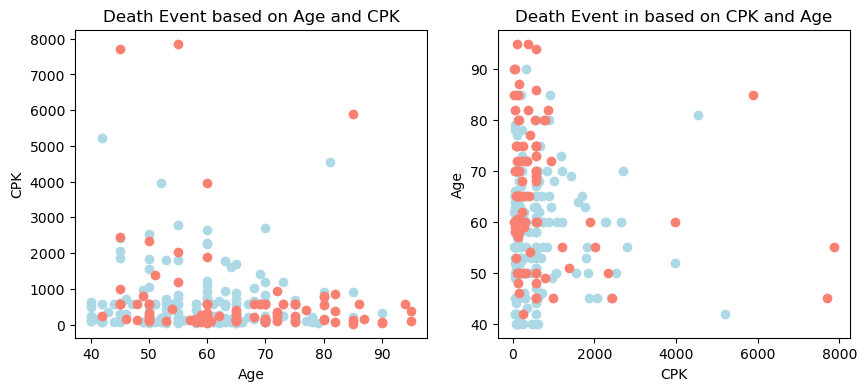

In [863]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.age[df.DEATH_EVENT == 0], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.age[df.DEATH_EVENT == 1], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Age and CPK')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('CPK')

axs[1].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 0], 
                        df.age[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 1], 
                        df.age[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on CPK and Age')
axs[1].set_ylabel('Age')
axs[1].set_xlabel('CPK')

Text(0.5, 0, 'EF')

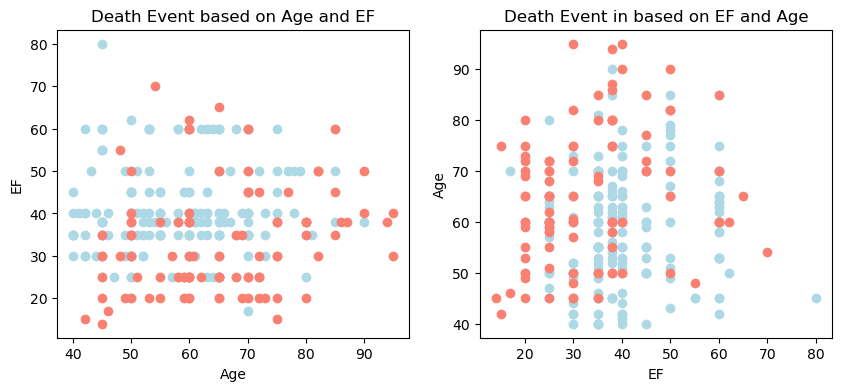

In [864]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.age[df.DEATH_EVENT == 0], 
                        df.ejection_fraction[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.age[df.DEATH_EVENT == 1], 
                        df.ejection_fraction[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Age and EF')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('EF')

axs[1].scatter(df.ejection_fraction[df.DEATH_EVENT == 0], 
                        df.age[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.ejection_fraction[df.DEATH_EVENT == 1], 
                        df.age[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on EF and Age')
axs[1].set_ylabel('Age')
axs[1].set_xlabel('EF')

Text(0.5, 0, 'Platelets')

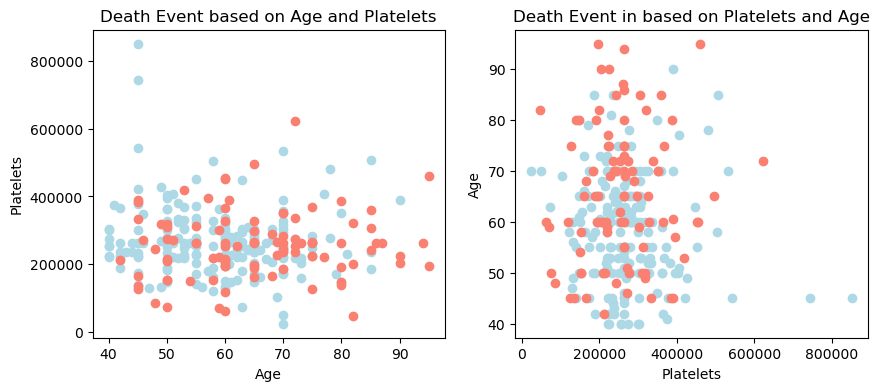

In [865]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.age[df.DEATH_EVENT == 0], 
                        df.platelets[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.age[df.DEATH_EVENT == 1], 
                        df.platelets[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Age and Platelets')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Platelets')

axs[1].scatter(df.platelets[df.DEATH_EVENT == 0], 
                        df.age[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.platelets[df.DEATH_EVENT == 1], 
                        df.age[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on Platelets and Age')
axs[1].set_ylabel('Age')
axs[1].set_xlabel('Platelets')

Text(0.5, 0, 'Cr')

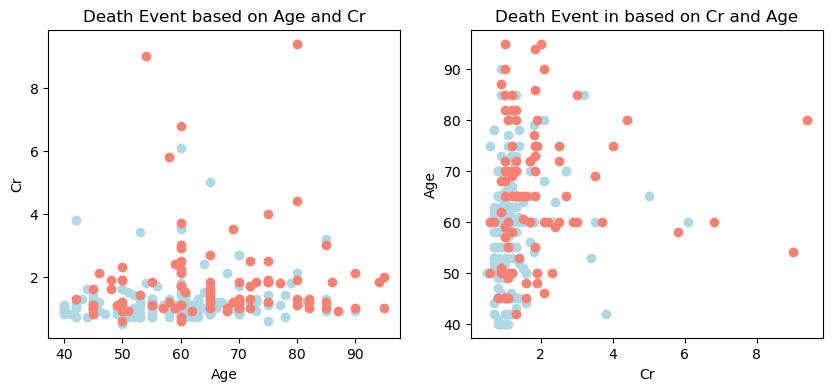

In [866]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.age[df.DEATH_EVENT == 0], 
                        df.serum_creatinine[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.age[df.DEATH_EVENT == 1], 
                        df.serum_creatinine[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Age and Cr')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Cr')

axs[1].scatter(df.serum_creatinine[df.DEATH_EVENT == 0], 
                        df.age[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.serum_creatinine[df.DEATH_EVENT == 1], 
                        df.age[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on Cr and Age')
axs[1].set_ylabel('Age')
axs[1].set_xlabel('Cr')

Text(0.5, 0, 'Na')

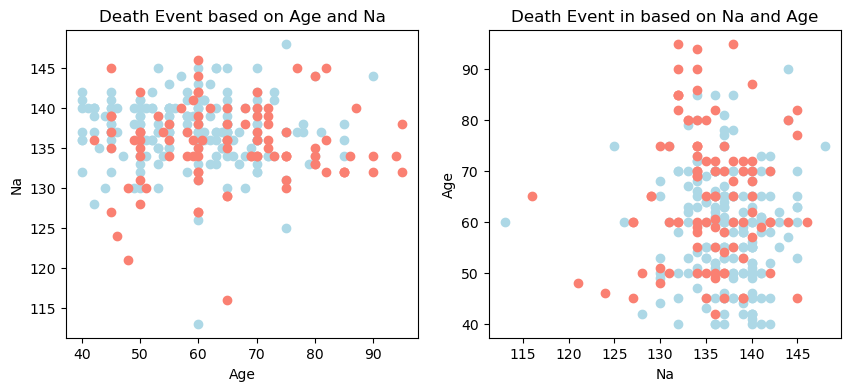

In [867]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.age[df.DEATH_EVENT == 0], 
                        df.serum_sodium[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.age[df.DEATH_EVENT == 1], 
                        df.serum_sodium[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Age and Na')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Na')

axs[1].scatter(df.serum_sodium[df.DEATH_EVENT == 0], 
                        df.age[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.serum_sodium[df.DEATH_EVENT == 1], 
                        df.age[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on Na and Age')
axs[1].set_ylabel('Age')
axs[1].set_xlabel('Na')

Text(0.5, 0, 'EF')

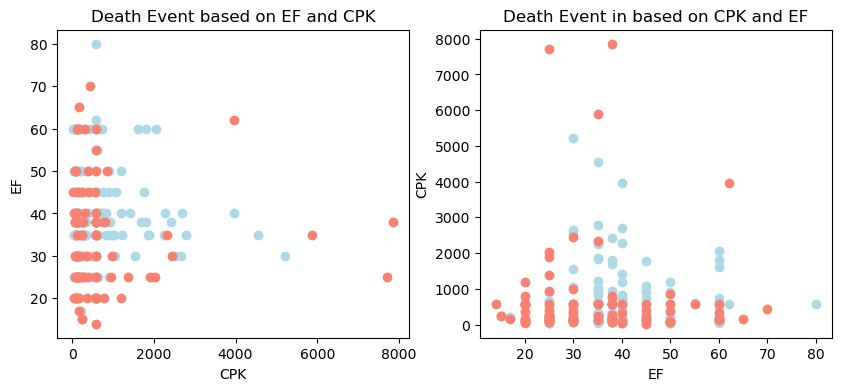

In [868]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 0], 
                        df.ejection_fraction[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 1], 
                        df.ejection_fraction[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on EF and CPK')
axs[0].set_xlabel('CPK')
axs[0].set_ylabel('EF')

axs[1].scatter(df.ejection_fraction[df.DEATH_EVENT == 0], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.ejection_fraction[df.DEATH_EVENT == 1], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on CPK and EF')
axs[1].set_ylabel('CPK')
axs[1].set_xlabel('EF')

Text(0.5, 0, 'Platelets')

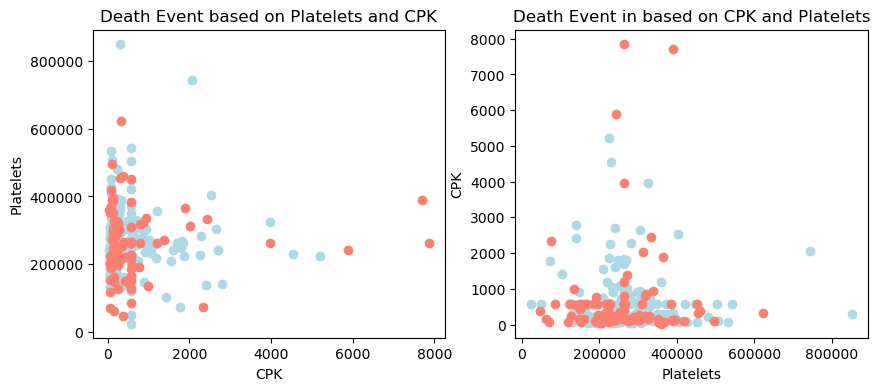

In [869]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 0], 
                        df.platelets[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 1], 
                        df.platelets[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Platelets and CPK')
axs[0].set_xlabel('CPK')
axs[0].set_ylabel('Platelets')

axs[1].scatter(df.platelets[df.DEATH_EVENT == 0], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.platelets[df.DEATH_EVENT == 1], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on CPK and Platelets')
axs[1].set_ylabel('CPK')
axs[1].set_xlabel('Platelets')

Text(0.5, 0, 'Cr')

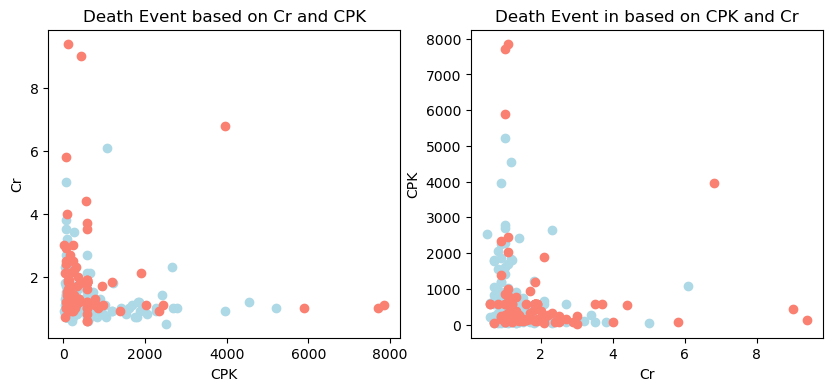

In [870]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 0], 
                        df.serum_creatinine[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 1], 
                        df.serum_creatinine[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Cr and CPK')
axs[0].set_xlabel('CPK')
axs[0].set_ylabel('Cr')

axs[1].scatter(df.serum_creatinine[df.DEATH_EVENT == 0], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.serum_creatinine[df.DEATH_EVENT == 1], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on CPK and Cr')
axs[1].set_ylabel('CPK')
axs[1].set_xlabel('Cr')

Text(0.5, 0, 'Na')

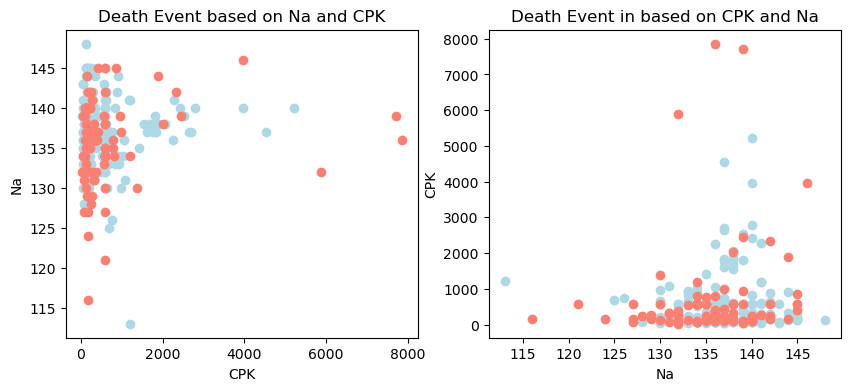

In [871]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 0], 
                        df.serum_sodium[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 1], 
                        df.serum_sodium[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Na and CPK')
axs[0].set_xlabel('CPK')
axs[0].set_ylabel('Na')

axs[1].scatter(df.serum_sodium[df.DEATH_EVENT == 0], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.serum_sodium[df.DEATH_EVENT == 1], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on CPK and Na')
axs[1].set_ylabel('CPK')
axs[1].set_xlabel('Na')

Text(0.5, 0, 'Na')

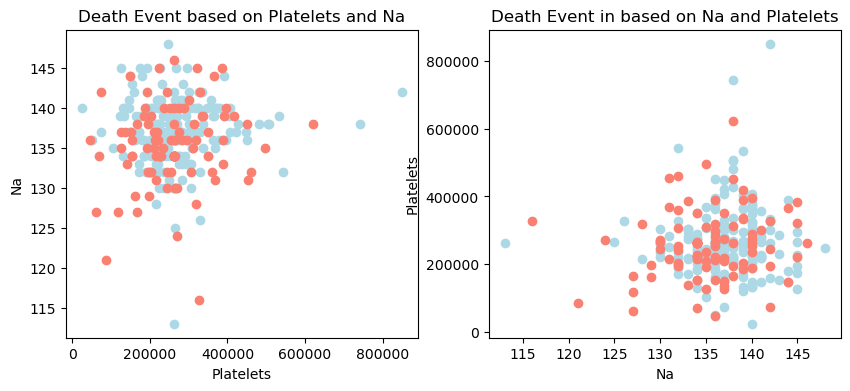

In [872]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.platelets[df.DEATH_EVENT == 0], 
                        df.serum_sodium[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.platelets[df.DEATH_EVENT == 1], 
                        df.serum_sodium[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Platelets and Na')
axs[0].set_xlabel('Platelets')
axs[0].set_ylabel('Na')

axs[1].scatter(df.serum_sodium[df.DEATH_EVENT == 0], 
                        df.platelets[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.serum_sodium[df.DEATH_EVENT == 1], 
                        df.platelets[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on Na and Platelets')
axs[1].set_ylabel('Platelets')
axs[1].set_xlabel('Na')

Text(0.5, 0, 'Cr')

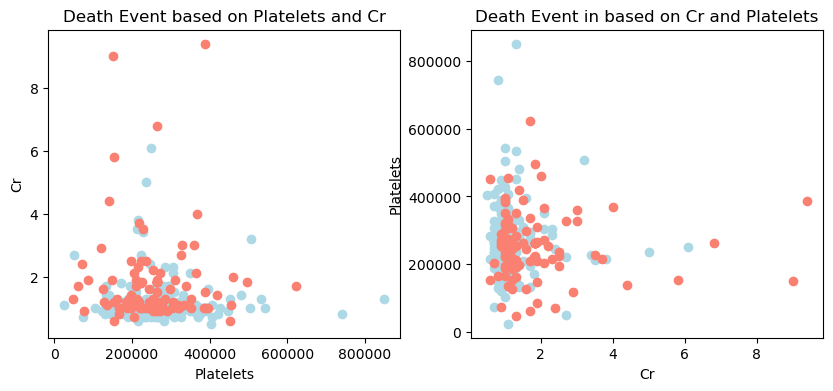

In [873]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.platelets[df.DEATH_EVENT == 0], 
                        df.serum_creatinine[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.platelets[df.DEATH_EVENT == 1], 
                        df.serum_creatinine[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Platelets and Cr')
axs[0].set_xlabel('Platelets')
axs[0].set_ylabel('Cr')

axs[1].scatter(df.serum_creatinine[df.DEATH_EVENT == 0], 
                        df.platelets[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.serum_creatinine[df.DEATH_EVENT == 1], 
                        df.platelets[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on Cr and Platelets')
axs[1].set_ylabel('Platelets')
axs[1].set_xlabel('Cr')

Text(0.5, 0, 'Cr')

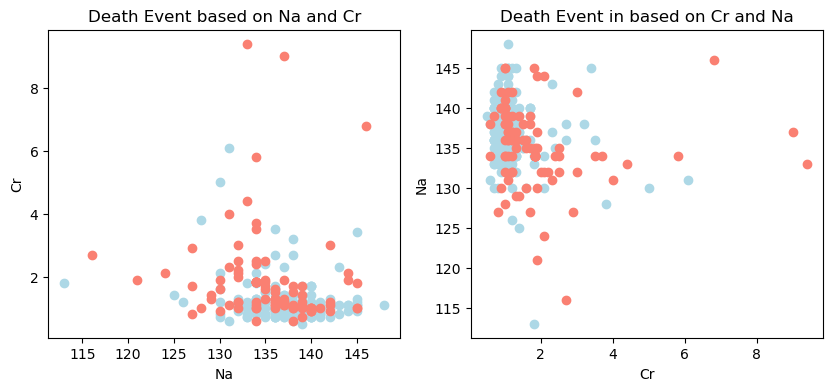

In [874]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.serum_sodium[df.DEATH_EVENT == 0], 
                        df.serum_creatinine[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.serum_sodium[df.DEATH_EVENT == 1], 
                        df.serum_creatinine[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Na and Cr')
axs[0].set_xlabel('Na')
axs[0].set_ylabel('Cr')

axs[1].scatter(df.serum_creatinine[df.DEATH_EVENT == 0], 
                        df.serum_sodium[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.serum_creatinine[df.DEATH_EVENT == 1], 
                        df.serum_sodium[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on Cr and Na')
axs[1].set_ylabel('Na')
axs[1].set_xlabel('Cr')

Text(0.5, 0, 'Age')

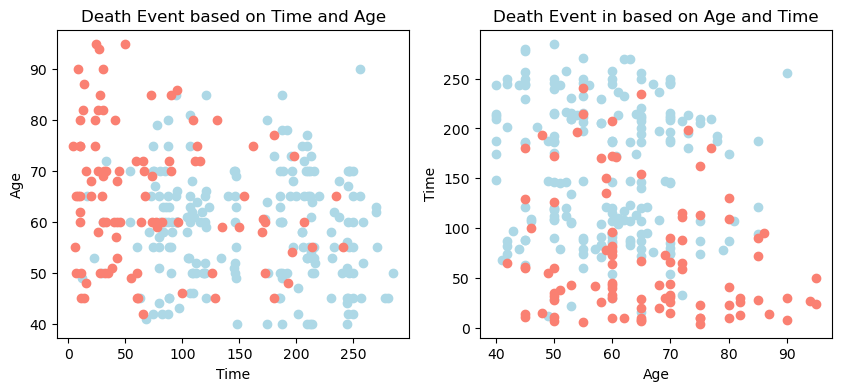

In [875]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.time[df.DEATH_EVENT == 0], 
                        df.age[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.time[df.DEATH_EVENT == 1], 
                        df.age[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Time and Age')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Age')

axs[1].scatter(df.age[df.DEATH_EVENT == 0], 
                        df.time[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.age[df.DEATH_EVENT == 1], 
                        df.time[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on Age and Time')
axs[1].set_ylabel('Time')
axs[1].set_xlabel('Age')

Text(0.5, 0, 'Na')

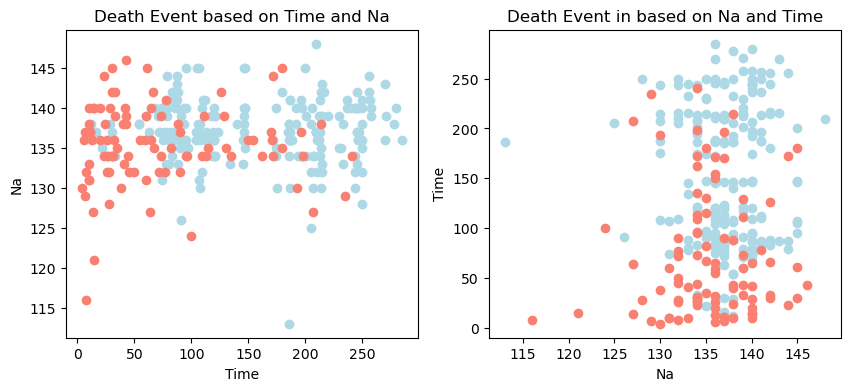

In [876]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.time[df.DEATH_EVENT == 0], 
                        df.serum_sodium[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.time[df.DEATH_EVENT == 1], 
                        df.serum_sodium[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Time and Na')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Na')

axs[1].scatter(df.serum_sodium[df.DEATH_EVENT == 0], 
                        df.time[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.serum_sodium[df.DEATH_EVENT == 1], 
                        df.time[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on Na and Time')
axs[1].set_ylabel('Time')
axs[1].set_xlabel('Na')

Text(0.5, 0, 'Cr')

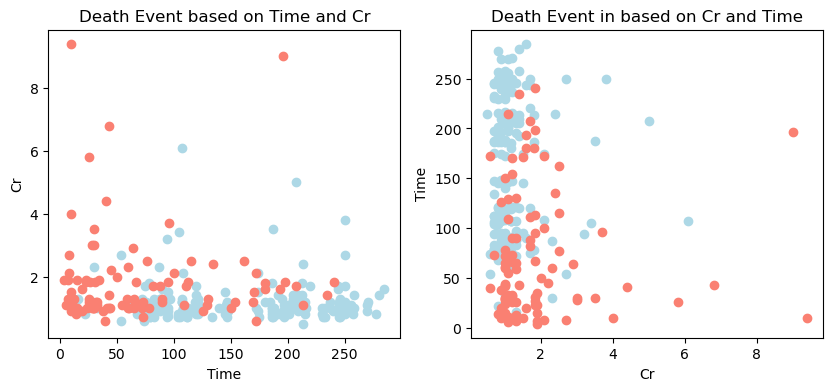

In [877]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.time[df.DEATH_EVENT == 0], 
                        df.serum_creatinine[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.time[df.DEATH_EVENT == 1], 
                        df.serum_creatinine[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Time and Cr')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Cr')

axs[1].scatter(df.serum_creatinine[df.DEATH_EVENT == 0], 
                        df.time[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.serum_creatinine[df.DEATH_EVENT == 1], 
                        df.time[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on Cr and Time')
axs[1].set_ylabel('Time')
axs[1].set_xlabel('Cr')

Text(0.5, 0, 'Platelets')

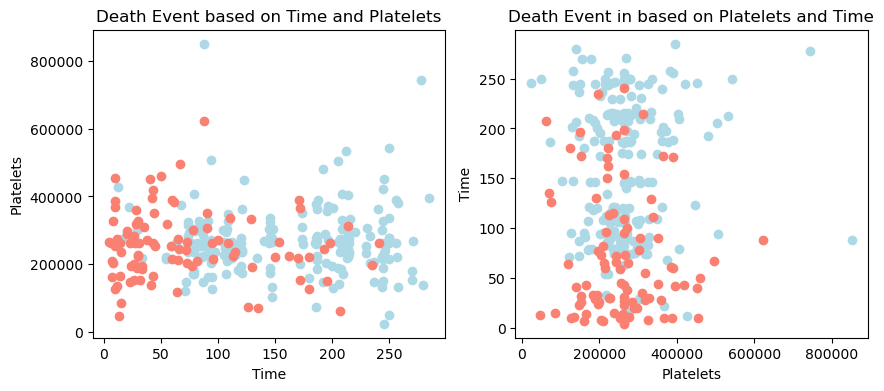

In [878]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.time[df.DEATH_EVENT == 0], 
                        df.platelets[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.time[df.DEATH_EVENT == 1], 
                        df.platelets[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Time and Platelets')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Platelets')

axs[1].scatter(df.platelets[df.DEATH_EVENT == 0], 
                        df.time[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.platelets[df.DEATH_EVENT == 1], 
                        df.time[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on Platelets and Time')
axs[1].set_ylabel('Time')
axs[1].set_xlabel('Platelets')

Text(0.5, 0, 'EF')

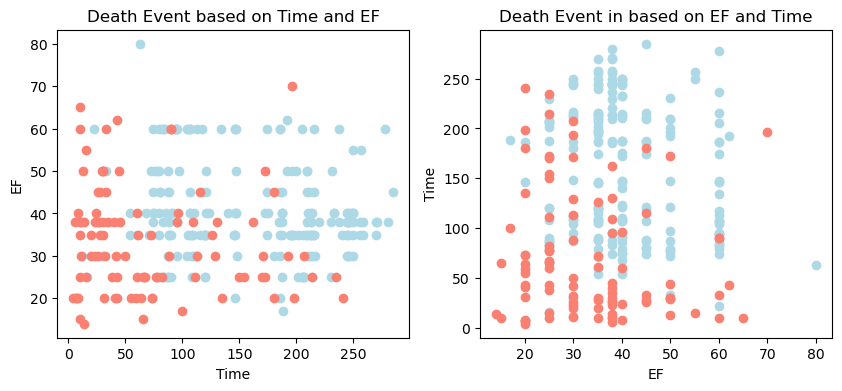

In [879]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.time[df.DEATH_EVENT == 0], 
                        df.ejection_fraction[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.time[df.DEATH_EVENT == 1], 
                        df.ejection_fraction[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Time and EF')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('EF')

axs[1].scatter(df.ejection_fraction[df.DEATH_EVENT == 0], 
                        df.time[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.ejection_fraction[df.DEATH_EVENT == 1], 
                        df.time[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on EF and Time')
axs[1].set_ylabel('Time')
axs[1].set_xlabel('EF')

Text(0.5, 0, 'CPK')

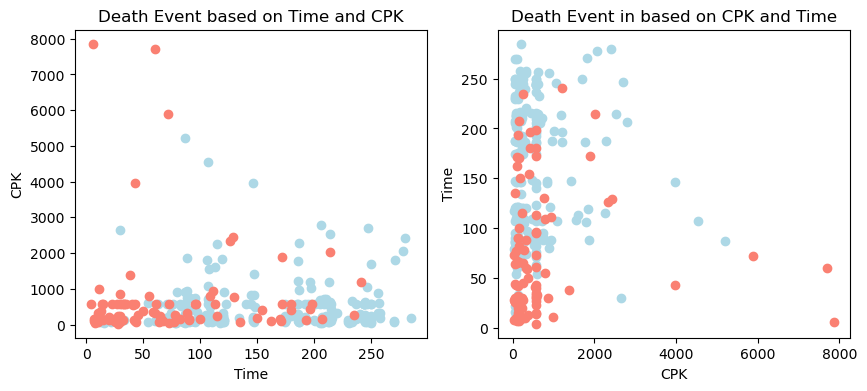

In [880]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df.time[df.DEATH_EVENT == 0], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 0], color='lightblue')

axs[0].scatter(df.time[df.DEATH_EVENT == 1], 
                        df.creatinine_phosphokinase[df.DEATH_EVENT == 1], color='salmon')

axs[0].set_title('Death Event based on Time and CPK')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('CPK')

axs[1].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 0], 
                        df.time[df.DEATH_EVENT == 0], color='lightblue')

axs[1].scatter(df.creatinine_phosphokinase[df.DEATH_EVENT == 1], 
                        df.time[df.DEATH_EVENT == 1], color='salmon')

axs[1].set_title('Death Event in based on CPK and Time')
axs[1].set_ylabel('Time')
axs[1].set_xlabel('CPK')

Text(0.5, 0, 'cPK')

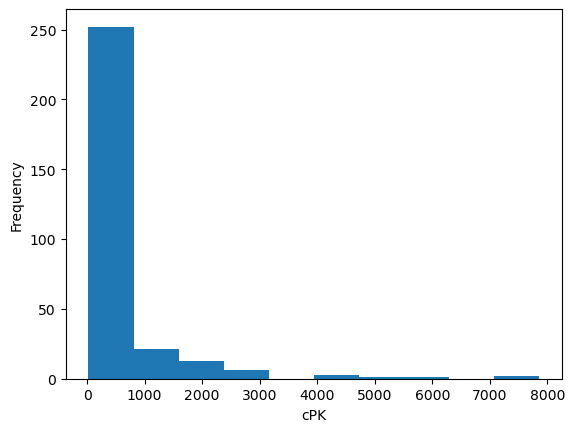

In [881]:
df.creatinine_phosphokinase.plot.hist()
plt.xlabel('cPK')

Text(0.5, 0, 'Age')

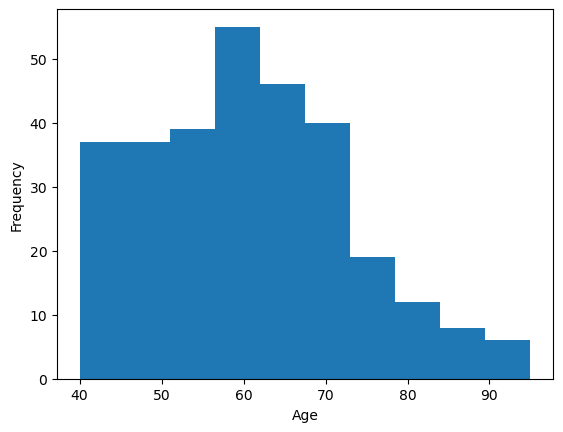

In [882]:
df.age.plot.hist()
plt.xlabel('Age')

Text(0.5, 0, 'EF')

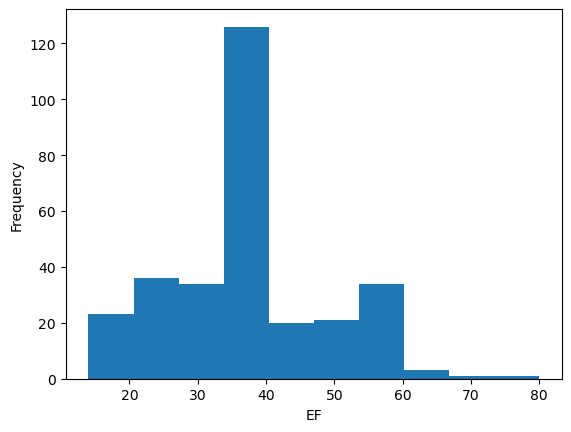

In [883]:
df.ejection_fraction.plot.hist()
plt.xlabel('EF')

Text(0.5, 0, 'Platelets')

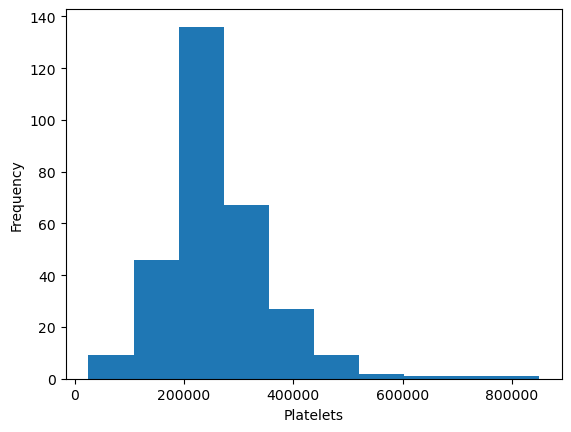

In [884]:
df.platelets.plot.hist()
plt.xlabel('Platelets')

Text(0.5, 0, 'Cr')

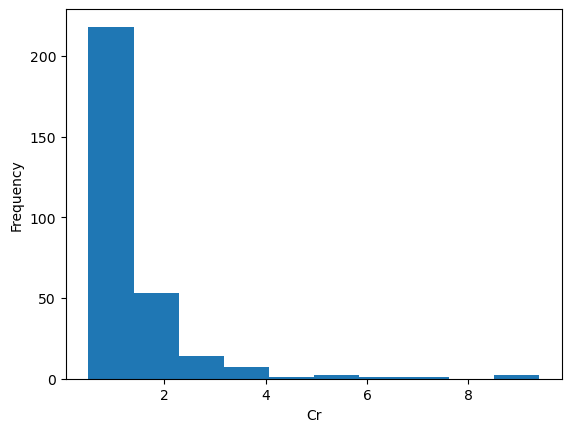

In [885]:
df.serum_creatinine.plot.hist()
plt.xlabel('Cr')

Text(0.5, 0, 'Na')

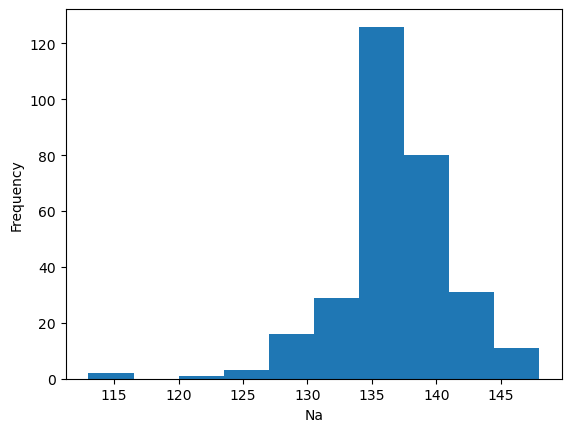

In [886]:
df.serum_sodium.plot.hist()
plt.xlabel('Na')

In [887]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


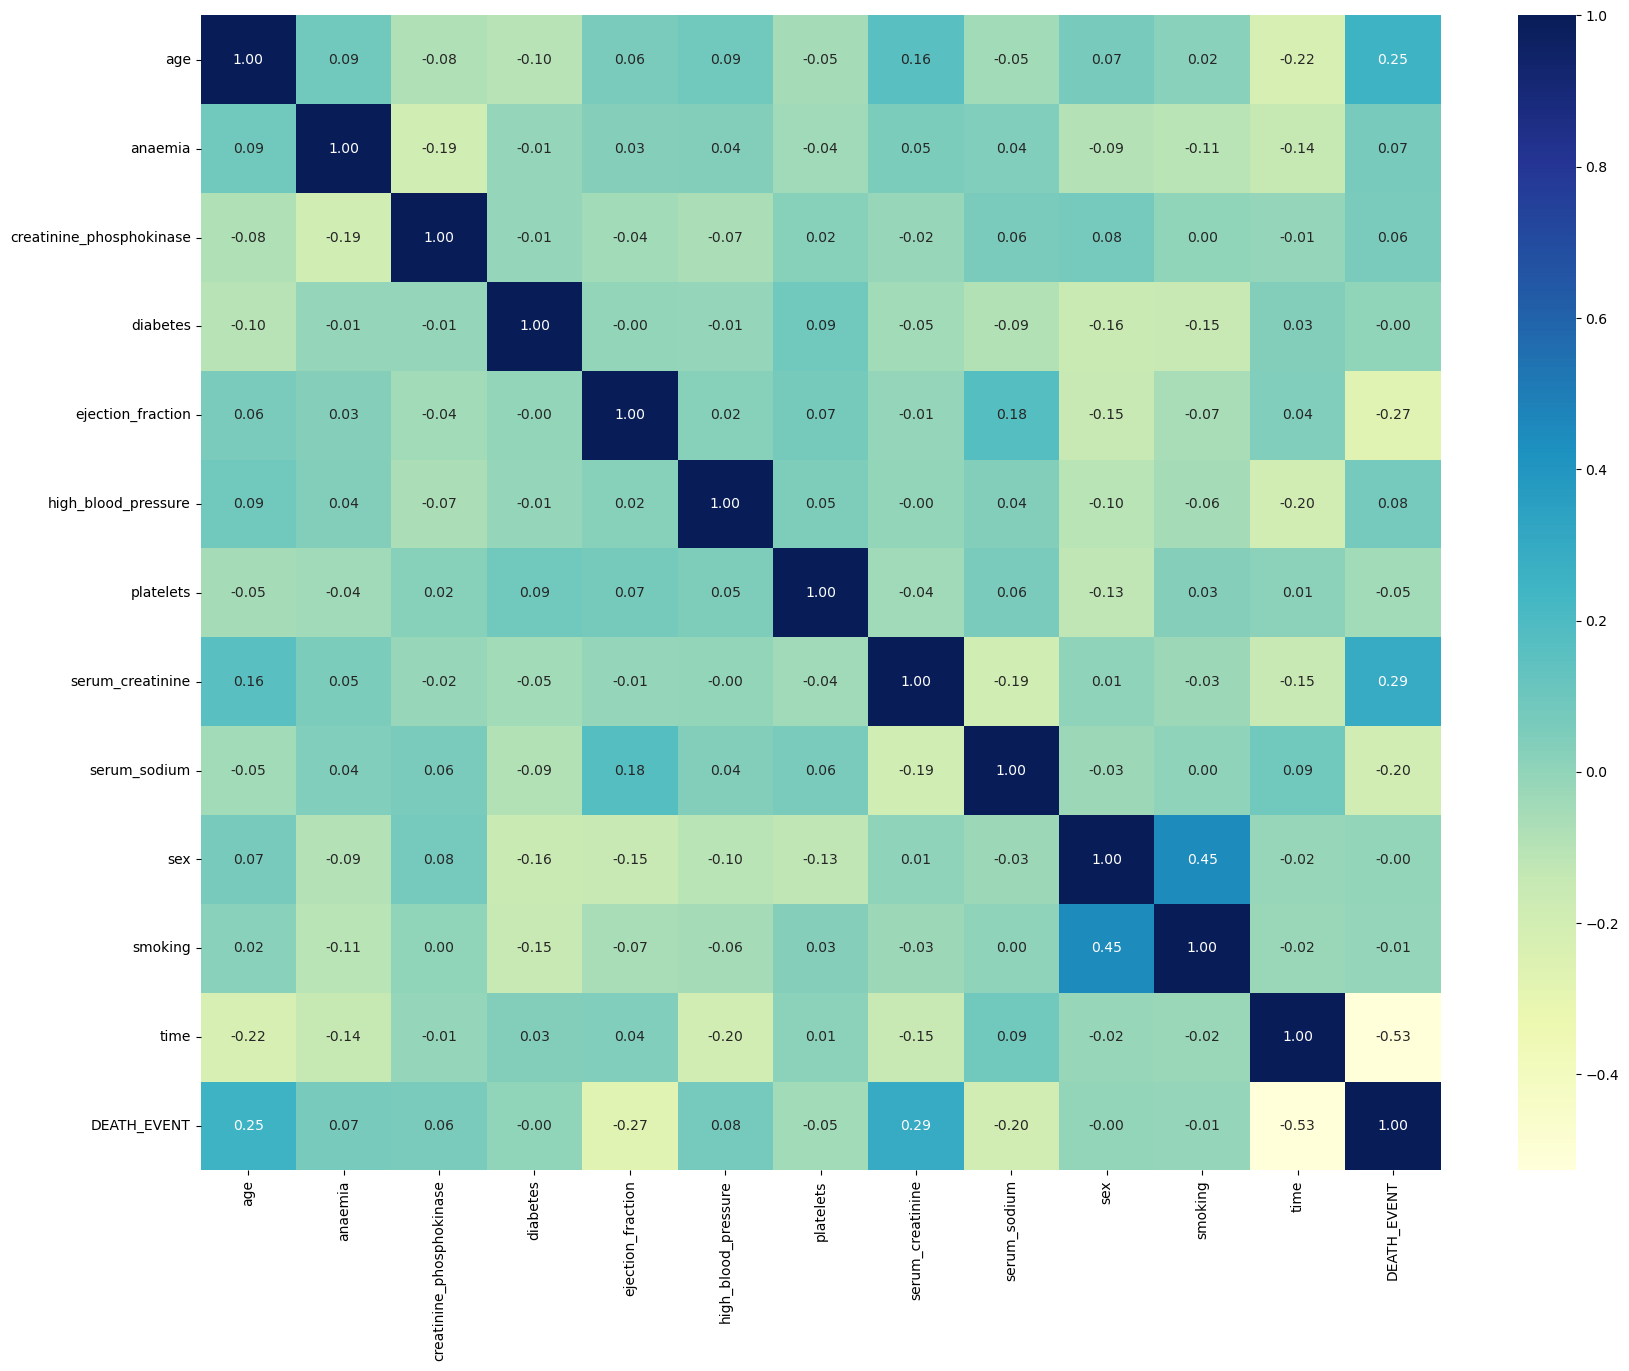

In [888]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

## 5. Modeling 
* Logistic Regression
* RandomForest Classifier
* KNeighbors Classifier

In [889]:
def fit_and_score(models, X_train, y_train, X_test, y_test):
    models_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        models_scores[name] = score
    return models_scores

In [890]:
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

In [891]:
X = df.drop("DEATH_EVENT", axis=1)
y = df['DEATH_EVENT']

In [892]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [893]:
model_scores = fit_and_score(models, X_train, y_train, X_test, y_test)

In [894]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])

In [895]:
model_compare

,LogisticRegression,RandomForestClassifier,KNeighborsClassifier
Accuracy,0.866667,0.85,0.6


<Axes: >

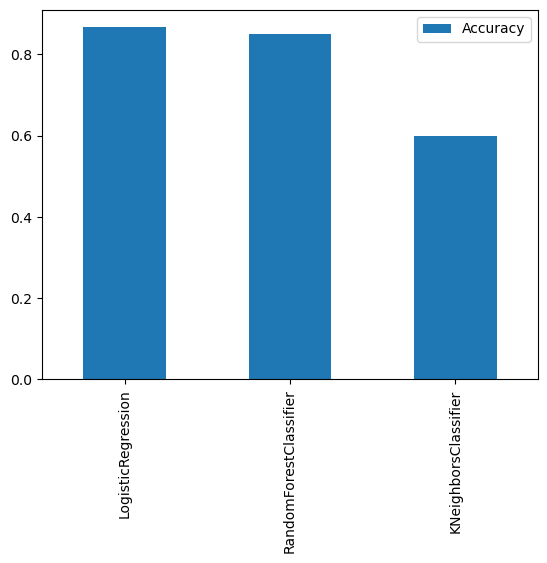

In [896]:
model_compare.T.plot(kind='bar')

## Parameter tuning

In [897]:
lor = LogisticRegression(solver='liblinear',
                          penalty='l1',
                          C=1)
lor.fit(X_train, y_train)
lor.score(X_test, y_test)

0.85

In [898]:
knn = KNeighborsClassifier()
test_score = []
train_score = []
neigh = range(1, 21, 1)
for i in neigh:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))    

In [899]:
test_score

[0.6666666666666666,
 0.7,
 0.6333333333333333,
 0.6666666666666666,
 0.6,
 0.6833333333333333,
 0.6333333333333333,
 0.65,
 0.6166666666666667,
 0.6666666666666666,
 0.6666666666666666,
 0.7,
 0.65,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7166666666666667,
 0.6666666666666666,
 0.7166666666666667]

In [900]:
train_score

[1.0,
 0.7824267782426778,
 0.7615062761506276,
 0.7238493723849372,
 0.7531380753138075,
 0.7154811715481172,
 0.7071129707112971,
 0.6820083682008368,
 0.6861924686192469,
 0.6736401673640168,
 0.6652719665271967,
 0.6610878661087866,
 0.6820083682008368,
 0.6694560669456067,
 0.6694560669456067,
 0.6694560669456067,
 0.6652719665271967,
 0.6694560669456067,
 0.6736401673640168,
 0.6694560669456067]

Max Score:  71.67%


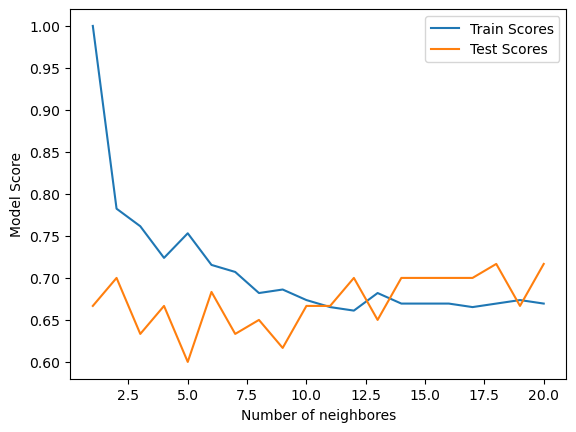

In [901]:
plt.plot(neigh, train_score, label="Train Scores")
plt.plot(neigh, test_score, label="Test Scores")
plt.xlabel("Number of neighbores")
plt.ylabel("Model Score")
plt.legend()
print(f"Max Score: {max(test_score) * 100: .2f}%")

In [902]:
rfc = RandomForestClassifier(n_estimators=1000,
                            max_depth=100,
                            min_samples_split=20,
                            min_samples_leaf=20)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9166666666666666

### With RandomizedSearchCV

In [903]:

lr_grid = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20)
}

rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(1, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [904]:
np.random.seed(42)
lr_rs = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=lr_grid,
    n_jobs=1,
    cv=10,
    n_iter=20,
    verbose=True)

lr_rs.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [905]:
lr_rs.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 10000.0}

In [906]:
lr_rs.score(X_test, y_test)

0.8833333333333333

In [907]:
np.random.seed(42)
rf_rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_grid,
    n_jobs=1,
    cv=10,
    n_iter=20,
    verbose=True)

rf_rs.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [908]:
rf_rs.best_params_

{'n_estimators': 510,
 'min_samples_split': 19,
 'min_samples_leaf': 13,
 'max_depth': 5}

In [909]:
rf_rs.score(X_test, y_test)

0.8833333333333333

### With GridSearchCV

In [910]:
lr_grid = {
    'solver': ['liblinear'],
    'penalty': ['l1'],
    'C': [1] + (np.logspace(-4, 4, 10))
}

rf_grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [3, 5],
    'min_samples_split': [20],
    'min_samples_leaf': [20]
}

In [911]:
np.random.seed(42)
lr_gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=lr_grid,
    n_jobs=1,
    cv=10,
    verbose=True)

lr_gs.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.00010000e+00, 1.00077426e+00, 1.00599484e+00, 1.04641589e+00,
       1.35938137e+00, 3.78255940e+00, 2.25443469e+01, 1.67810054e+02,
       1.29254967e+03, 1.00010000e+04]),
                         'penalty': ['l1'], 'solver': ['liblinear']},
             verbose=True)

In [912]:
lr_gs.best_params_

{'C': 1.0001, 'penalty': 'l1', 'solver': 'liblinear'}

In [913]:
lr_gs.score(X_test, y_test)

0.85

In [914]:
np.random.seed(42)
rf_gs = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_grid,
    n_jobs=1,
    cv=10,
    verbose=True)

rf_gs.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [3, 5], 'min_samples_leaf': [20],
                         'min_samples_split': [20],
                         'n_estimators': [10, 100, 1000]},
             verbose=True)

In [915]:
rf_gs.best_params_

{'max_depth': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 20,
 'n_estimators': 100}

In [916]:
rf_gs.score(X_test, y_test)

0.9166666666666666

### Final Model and Evaluation

In [917]:
np.random.seed(42)
model = RandomForestClassifier(
                            n_estimators=100,
                            max_depth=5,
                            min_samples_split=20,
                            min_samples_leaf=20)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9166666666666666

In [918]:
y_preds = model.predict(X_test)

In [919]:
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [920]:
y_test

160    0
293    0
229    0
173    0
66     1
235    0
37     1
165    1
278    0
215    0
269    0
266    1
253    0
230    1
25     1
6      1
83     0
96     0
146    0
175    0
65     1
223    0
3      1
210    0
118    0
169    0
21     1
139    0
64     0
262    1
108    0
201    0
24     1
42     1
197    0
109    0
143    0
295    0
86     0
222    0
225    0
170    0
204    0
78     0
203    0
242    0
8      1
99     0
274    0
198    0
127    0
98     0
90     0
105    1
48     1
255    0
190    0
275    0
289    0
59     1
Name: DEATH_EVENT, dtype: int64

In [921]:
conf_matrix = confusion_matrix(y_test, y_preds) 

In [922]:
pd.DataFrame(conf_matrix)

,0,1
0,43,0
1,5,12


Text(50.722222222222214, 0.5, 'Actual Value')

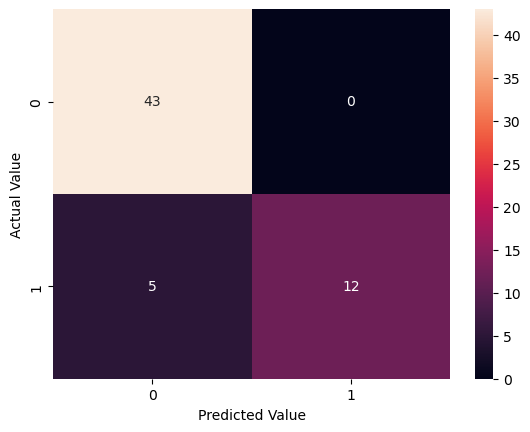

In [923]:
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [924]:
roc_score = roc_auc_score(y_test, y_preds)
roc_score

0.8529411764705883

In [925]:
fpr, tpr, threshold = roc_curve(y_test, y_preds)

In [926]:
fpr, tpr, threshold

(array([0., 0., 1.]),
 array([0.        , 0.70588235, 1.        ]),
 array([2, 1, 0], dtype=int64))

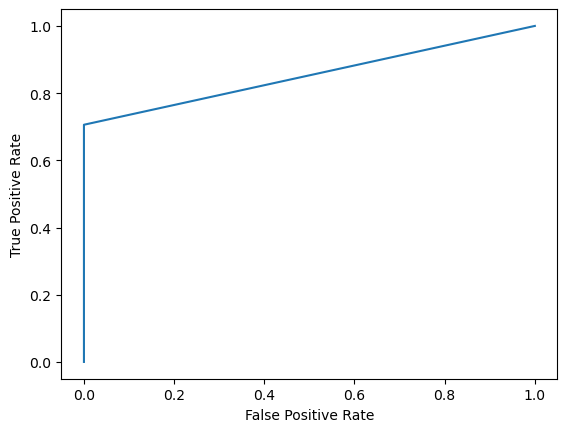

In [927]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [928]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.71      0.83        17

    accuracy                           0.92        60
   macro avg       0.95      0.85      0.89        60
weighted avg       0.93      0.92      0.91        60



In [929]:
cros_acc = cross_val_score(model, X, y)
cros_acc

array([0.78333333, 0.85      , 0.85      , 0.88333333, 0.83050847])

In [930]:
np.mean(cros_acc)

0.8394350282485876

In [931]:
cros_f1 = cross_val_score(model, X, y, scoring='f1')
cros_f1

array([0.5625    , 0.6875    , 0.68965517, 0.85      , 0.66666667])

In [932]:
np.mean(cros_f1)

0.6912643678160919

In [933]:
cros_recall = cross_val_score(model, X, y, scoring='recall')
cros_recall

array([0.47368421, 0.63157895, 0.52631579, 0.85      , 0.52631579])

In [934]:
np.mean(cros_recall)

0.601578947368421

In [935]:
cros_pre = cross_val_score(model, X, y, scoring='precision')
cros_pre

array([0.64285714, 0.85714286, 1.        , 0.89473684, 0.92307692])

In [936]:
np.mean(cros_pre)

0.8635627530364373

In [937]:
cv_metrics = pd.DataFrame({"Accuracy": np.mean(cros_acc),
                          "Precision": np.mean(cros_pre),
                          "F1": np.mean(cros_f1),
                          "Recall": np.mean(cros_recall)}, index=[0])

In [938]:
cv_metrics

,Accuracy,Precision,F1,Recall
0,0.839435,0.863563,0.691264,0.601579


<Axes: >

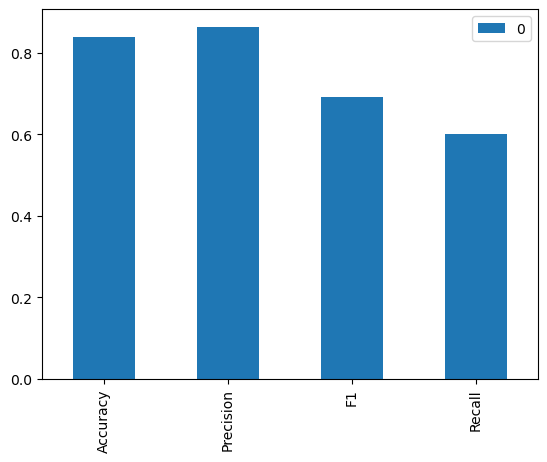

In [939]:
cv_metrics.T.plot.bar()

## Feature importance

In [952]:
feature_dict = dict(zip(X.columns, model.feature_importances_))

In [955]:
pd.DataFrame(feature_dict, index=[0])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.082639,0.010512,0.027024,0.003183,0.162668,0.006481,0.029545,0.155501,0.09474,0.003556,0.003148,0.421003


<Axes: >

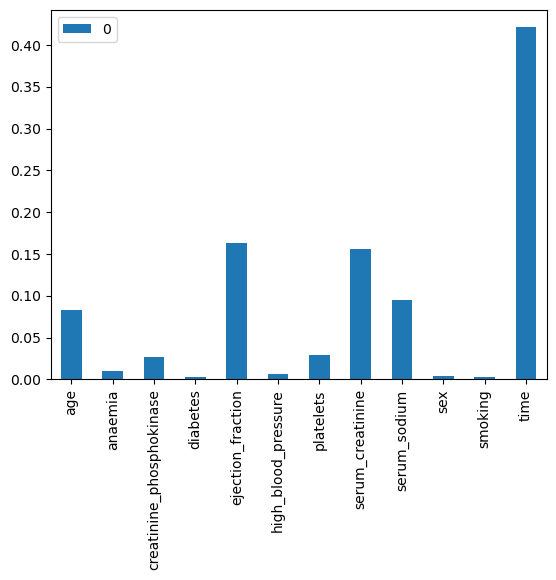

In [958]:
pd.DataFrame(feature_dict, index=[0]).T.plot.bar()